# Analyzing the Lagos State Real Estate Market II
In this project, we will be analyzing the Lagos real estate market in order to understand the relationship between certain important features and price. Our dataset has been collected from the property website `PropertyPro.ng`.

We've previously cleaned this dataset and it is ready for analysis. The dataset has the following features:
* `Location`: The Address of the property
* `Description`: Details about the property and the listing
* `Listing_Type`: i.e. Rent, Sale, Shortlet
* `Price`: Price for sale or rent. Note that all rental prices are annual rents
* `Beds`: Number of bedrooms in this listing
* `Baths`: Number of bathrooms in this listing
* `Toilets`: Number of Toilets in this listing
* `City`: City in Lagos where the property is located
* `Location_Area`: i.e. whether property is located on the Island or Mainland of Lagos.
* `Newly_Built`: Y/N (1/0)
* `Furnished`: Y/N (1/0)
* `Serviced`: Y/N (1/0)
* `Date_Added`: Date listing was added
* `Date_Updated`: Date listing was updated

Let's load the dataset and conduct some preliminary statistical analysis.

In [1]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import re

%matplotlib inline
style.use('fivethirtyeight')
# sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('lag_listings_clean.csv')
df.head()

,Location,Description,Listing_Type,Price,Beds,Baths,Toilets,City,Location_Area,Newly Built,Furnished,Serviced,Date_Added,Date_Updated
0,Bakare Estate Chevron Lekki Lagos,FOR RENT: BRAND NEW WELL SPACED DUPLEX IN A S...,Rent,4000000.0,3.0,3.0,4.0,Lekki,Island,1.0,0.0,1.0,2023-02-14,2023-02-19
1,"Phase 2 Estate, Gbagada Lagos",FOR RENT: RELATIVELY NEW 4 BEDROOM DUPLEX!!! ...,Rent,5500000.0,4.0,5.0,5.0,Gbagada,Mainland,0.0,0.0,0.0,2023-02-15,2023-02-19
2,Oregun Ikeja Lagos,FOR RENT: A basic 2 bedroom apartment in a lo...,Rent,1200000.0,2.0,2.0,2.0,Ikeja,Mainland,0.0,0.0,0.0,2023-01-04,2023-02-19
3,Opebi Ikeja Lagos,"FOR RENT: Lovely 2 bedrooms flat in opebi, up...",Rent,1500000.0,2.0,1.0,1.0,Ikeja,Mainland,1.0,0.0,0.0,2022-12-09,2023-02-19
4,Ikota Lekki Lagos,FOR RENT: FOR RENT: Luxury 5 Bedroom Detached...,Rent,8000000.0,5.0,6.0,7.0,Lekki,Island,1.0,0.0,0.0,2023-02-09,2023-02-19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17392 entries, 0 to 17391
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       17392 non-null  object 
 1   Description    17392 non-null  object 
 2   Listing_Type   17392 non-null  object 
 3   Price          17392 non-null  float64
 4   Beds           14755 non-null  float64
 5   Baths          14738 non-null  float64
 6   Toilets        14793 non-null  float64
 7   City           17392 non-null  object 
 8   Location_Area  17392 non-null  object 
 9   Newly Built    17392 non-null  float64
 10  Furnished      17392 non-null  float64
 11  Serviced       17392 non-null  float64
 12  Date_Added     17392 non-null  object 
 13  Date_Updated   17392 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.9+ MB


In [4]:
df.describe(include='all')

,Location,Description,Listing_Type,Price,Beds,Baths,Toilets,City,Location_Area,Newly Built,Furnished,Serviced,Date_Added,Date_Updated
count,17392,17392,17392,1.739200e+04,14755.000000,14738.000000,14793.000000,17392,17392,17392.000000,17392.000000,17392.000000,17392,17392
unique,4141,15735,3,NaN,NaN,NaN,NaN,40,2,NaN,NaN,NaN,354,195
top,Lekki Phase 1 Lekki Lagos,FOR RENT: Lovely .. Read more,Rent,NaN,NaN,NaN,NaN,Lekki,Island,NaN,NaN,NaN,2023-01-26,2023-02-14
freq,714,168,17242,NaN,NaN,NaN,NaN,5480,9394,NaN,NaN,NaN,362,4582
mean,NaN,NaN,NaN,1.132296e+08,1.736089,1.610463,1.964375,NaN,NaN,0.239420,0.077219,0.202507,NaN,NaN
std,NaN,NaN,NaN,9.443017e+09,1.694794,1.725529,2.038240,NaN,NaN,0.426742,0.266947,0.401880,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+06,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,2.500000e+06,2.000000,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,5.500000e+06,3.000000,3.000000,4.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN


Before we begin, we will split the dataset by listing type into sale and rent to avoid huge sale values skewing the spread. This will also allow us conduct appropriate analysis on the records.

In [5]:
df['Listing_Type'].value_counts()

Rent        17242
Sale          138
Shortlet       12
Name: Listing_Type, dtype: int64

In [6]:
sale = df.loc[df['Listing_Type'] == 'Sale']
rent = df.loc[df['Listing_Type'] == 'Rent']

In [7]:
sale.describe()

,Price,Beds,Baths,Toilets,Newly Built,Furnished,Serviced
count,1.380000e+02,82.000000,82.000000,82.000000,138.000000,138.000000,138.000000
mean,6.493109e+08,3.707317,3.585366,4.182927,0.500000,0.050725,0.217391
std,1.920116e+09,1.808675,2.113748,2.341932,0.501821,0.220234,0.413974
min,4.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.750000e+07,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000
50%,1.290000e+08,4.000000,4.000000,5.000000,0.500000,0.000000,0.000000
75%,3.300000e+08,5.000000,5.000000,6.000000,1.000000,0.000000,0.000000
max,1.350000e+10,8.000000,8.000000,9.000000,1.000000,1.000000,1.000000


In [8]:
rent.describe()

,Price,Beds,Baths,Toilets,Newly Built,Furnished,Serviced
count,1.724200e+04,14666.000000,14650.000000,14705.000000,17242.000000,17242.000000,17242.000000
mean,1.090002e+08,1.724669,1.599044,1.951445,0.237153,0.076963,0.202007
std,9.482339e+09,1.687931,1.716965,2.029793,0.425349,0.266541,0.401509
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,5.500000e+06,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000
max,1.200000e+12,10.000000,9.000000,9.000000,1.000000,1.000000,1.000000


Let's look at distribution of price values, as well as visual charts of categorical variables.

The average rent in Lagos is over NGN100m. Given that the mean is likely weighted by the max value (NGN1.2tr), let's determine how many values are in excess of NGN50m as well as values under NGN100k and determine how to handle them.

In [9]:
rent.loc[rent['Price'] >= 50000000]

,Location,Description,Listing_Type,Price,Beds,Baths,Toilets,City,Location_Area,Newly Built,Furnished,Serviced,Date_Added,Date_Updated
21,"Along Agege Motor Way, Between Ladipo Bus Stop...",FOR RENT: Warehouse for lease A shared compou...,Rent,8.100000e+07,0.0,0.0,0.0,Oshodi,Mainland,0.0,0.0,0.0,2022-09-30,2023-02-19
194,Banana Island Ikoyi Lagos,FOR RENT: TO LET: 12 BEDROOM ALL ROOMS ENSUIT...,Rent,5.500000e+07,10.0,0.0,0.0,Ikoyi,Island,0.0,0.0,0.0,2023-02-04,2023-02-15
651,Ojo Lagos,FOR RENT: 5-bay warehouse on 1.5 acres of lan...,Rent,1.200000e+09,0.0,0.0,0.0,Ojo,Mainland,0.0,0.0,0.0,2022-06-17,2023-02-18
692,Ikate Elegushi Ikate Lekki Lagos,FOR RENT: FULLY AUTOMATED FIVE(5)BEDROOM FULL...,Rent,4.000000e+08,5.0,5.0,6.0,Lekki,Island,1.0,0.0,0.0,2023-02-17,2023-02-18
699,Lagos Business School Ajah Lagos,FOR RENT: A newly built 4 bedroom semi detach...,Rent,6.300000e+07,4.0,4.0,4.0,Ajah,Island,1.0,0.0,0.0,2022-11-11,2023-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17192,Victoria Island Lagos,FOR RENT: FOR COMMERCIAL LETTING IN VICTORIA ...,Rent,5.000000e+07,0.0,0.0,0.0,Victoria Island,Island,0.0,0.0,0.0,2022-06-03,2022-07-25
17210,Ikoyi Lagos,FOR RENT: DIRECT LEASING INSTRUCTION AN EXTEN...,Rent,4.000000e+08,0.0,0.0,0.0,Ikoyi,Island,0.0,0.0,0.0,2022-07-22,2022-07-22
17217,Omole Phase 1 Estate Omole Phase 1 Ojodu Lagos,FOR RENT: 3bedroom detached duplex at Omole p...,Rent,1.095000e+09,0.0,0.0,0.0,Ojodu,Mainland,1.0,1.0,0.0,2022-05-17,2022-07-18
17304,Abule Egba Abule Egba Lagos,FOR RENT: Urgent lease lease lease.. About 9p...,Rent,5.000000e+07,0.0,0.0,0.0,Abule Egba,Mainland,0.0,0.0,0.0,2022-04-28,2022-06-16


In [10]:
rent.loc[rent['Price'] <= 100000]

,Location,Description,Listing_Type,Price,Beds,Baths,Toilets,City,Location_Area,Newly Built,Furnished,Serviced,Date_Added,Date_Updated
187,Idowu Taylor Victoria Island Lagos,FOR RENT: Double Glazed Curtain Wall Systems ...,Rent,550.0,0.0,0.0,0.0,Victoria Island,Island,0.0,0.0,1.0,2022-03-01,2023-02-15
206,Akin Adesola Victoria Island Lagos,FOR RENT: Raised Floor for underground cablin...,Rent,800.0,NaN,NaN,NaN,Victoria Island,Island,0.0,0.0,1.0,2022-03-01,2023-02-15
320,Adeola Odeku Victoria Island Lagos,FOR RENT: Fully serviced premium office space...,Rent,99000.0,0.0,0.0,0.0,Victoria Island,Island,0.0,0.0,0.0,2023-01-19,2023-02-15
578,Ogooluwa Giwa Aboru Ipaja Lagos,FOR RENT: Standard shop Location: Ogooluwa Gi...,Rent,36000.0,0.0,0.0,0.0,Ipaja,Mainland,0.0,0.0,0.0,2022-09-10,2023-02-19
607,Iwaya Iwaya Yaba Lagos,FOR RENT: 1 bedroom Flat / Apartment for rent...,Rent,400.0,1.0,1.0,1.0,Yaba,Mainland,0.0,0.0,0.0,2023-02-18,2023-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17341,Ajayi Road Ogba Lagos,FOR RENT: Newly built spacious mini flat all ...,Rent,650.0,0.0,0.0,0.0,Ogba,Mainland,0.0,0.0,0.0,2022-06-05,2022-06-05
17342,Oke Ira Ogba Lagos,FOR RENT: Very clean and sharp mini flat with...,Rent,500.0,0.0,0.0,0.0,Ogba,Mainland,0.0,0.0,0.0,2022-06-05,2022-06-05
17345,Oke Ira Ogba Lagos,FOR RENT: Very lovely mini flat stand alone j...,Rent,500.0,0.0,0.0,0.0,Ogba,Mainland,0.0,0.0,0.0,2022-06-05,2022-06-05
17351,Anthony Village Maryland Lagos,FOR RENT: A Purposely Built Office Complex af...,Rent,30000.0,0.0,0.0,0.0,Maryland,Mainland,0.0,0.0,1.0,2022-05-29,2022-06-05


From our preliminary analysis, these properties are commercial rentals, sales or outliers. We'll put them in a separate variable, `rent_over_50m` and `rent_under_100k` and drop these values from our rent dataset.

In [11]:
rent_over_50m = rent.loc[rent['Price'] >= 50000000]
rent_under_100k = rent.loc[rent['Price'] <= 100000]

rent.drop(labels=rent_over_50m.index, axis=0, inplace=True)
rent.drop(labels=rent_under_100k.index, axis=0, inplace=True)

Let's see the new max value

In [12]:
rent['Price'].describe()

count    1.669800e+04
mean     4.581160e+06
std      6.030027e+06
min      1.100000e+05
25%      1.000000e+06
50%      2.500000e+06
75%      5.000000e+06
max      4.940000e+07
Name: Price, dtype: float64

Let's plot the price distribution.

In [13]:
rent['Price'].value_counts(bins=20).sort_index(ascending=True)

(60709.999, 2574500.0]      8866
(2574500.0, 5039000.0]      3668
(5039000.0, 7503500.0]      1365
(7503500.0, 9968000.0]       554
(9968000.0, 12432500.0]      803
(12432500.0, 14897000.0]     290
(14897000.0, 17361500.0]     388
(17361500.0, 19826000.0]     113
(19826000.0, 22290500.0]     184
(22290500.0, 24755000.0]      27
(24755000.0, 27219500.0]     166
(27219500.0, 29684000.0]      12
(29684000.0, 32148500.0]     140
(32148500.0, 34613000.0]       5
(34613000.0, 37077500.0]      61
(37077500.0, 39542000.0]       2
(39542000.0, 42006500.0]      28
(42006500.0, 44471000.0]       1
(44471000.0, 46935500.0]      22
(46935500.0, 49400000.0]       3
Name: Price, dtype: int64

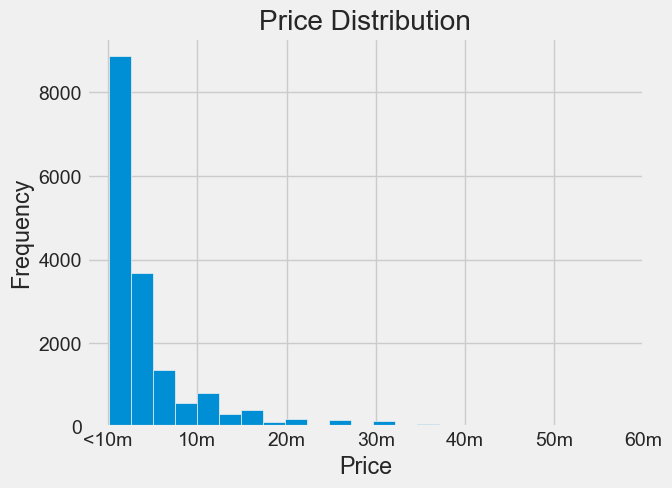

In [14]:
rent['Price'].plot.hist(bins=20)
locs, labels = plt.xticks()
labels = ['-10m', '<10m', '10m', '20m',
          '30m', '40m', '50m', '60m']
plt.xticks(ticks=locs[1:], labels=labels[1:])
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()

Nearly than half of our rent dataframe has an annual rent value of NGN2.5m and under. The median price is also NGN2.5m. The rental price distribution is very right skewed. Prices above 30m are very few. Let's reattempt the price distribution excluding those values.

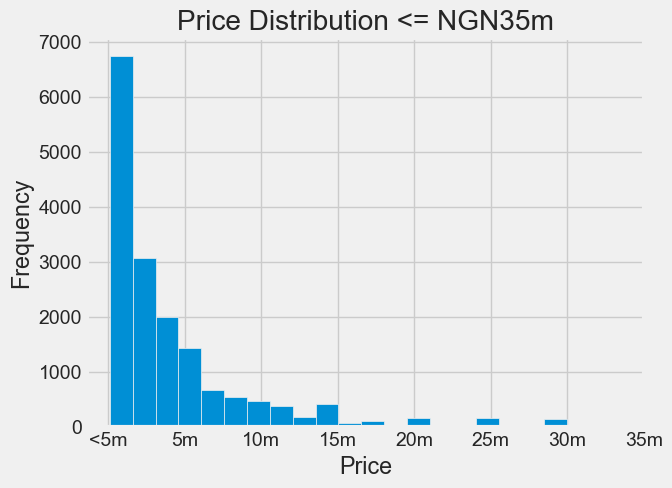

In [15]:
rent['Price'].loc[rent['Price'] <= 30000000].plot.hist(bins=20)
locs, labels = plt.xticks()
labels = ['-5m', '<5m', '5m', '10m', '15m',
          '20m', '25m', '30m', '35m']
plt.xticks(ticks=locs[1:], labels=labels[1:])
plt.xlabel('Price')
plt.title('Price Distribution <= NGN35m')
plt.show()

This distribution looks nearly as identical as the former. Let's plot the price distribution up to the 75th percentile

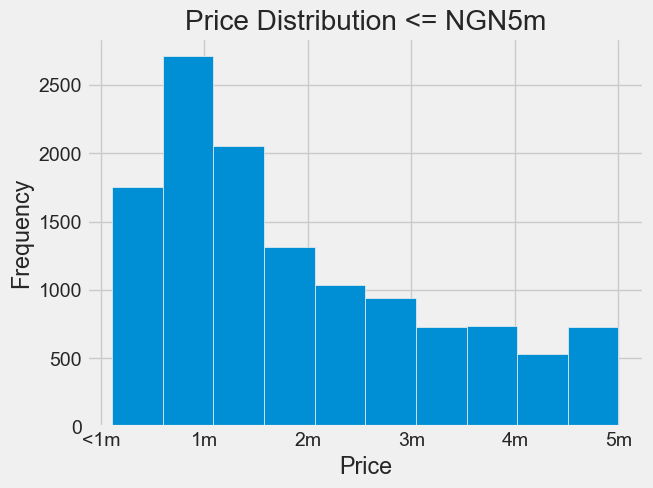

In [16]:
rent['Price'].loc[rent['Price'] <= 5000000].plot.hist()
locs, labels = plt.xticks()
labels = ['-1m', '<1m', '1m', '2m',
          '3m', '4m', '5m', '6m']
plt.xticks(ticks=locs[1:-1], labels=labels[1:-1])
plt.xlabel('Price')
plt.title('Price Distribution <= NGN5m')
plt.show()

This distribution shows a slightly different picture. It's still right skewed, but the mode of this distribution is more clearly identified as being in the NGN1m range. Also given that the mode of the distribution has consistently being under NGN5m, this distribution shows the range of rental values for most properties in Lagos.

Let's plot grouped bar chart of the bed, bath and toilets column.

<AxesSubplot:>

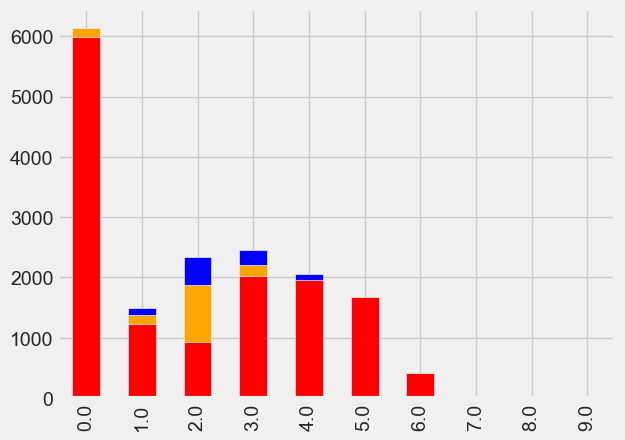

In [17]:
rent['Beds'].value_counts().sort_index().plot.bar(color='blue')
rent['Baths'].value_counts().sort_index().plot.bar(color='orange')
rent['Toilets'].value_counts().sort_index().plot.bar(color='red')

Let's plot a horizontal bar graph of the top 20 cities in the dataset and a pie chart of the location area.

In [18]:
df['Location_Area'].value_counts()

Island      9394
Mainland    7998
Name: Location_Area, dtype: int64

In [19]:
plt.pie()

TypeError: pie() missing 1 required positional argument: 'x'

In [ ]:
df['Location_Area'].value_counts().plot.pie(autopct=f'{:.2f}')
plt.title('Location Area')
plt.ylabel('')

In [ ]:
rent['City'].value_counts(ascending=True)[-10:].plot.barh()
plt.xlabel('Number of Listings')
plt.title('Top 10 Cities in the Lagos Rental Market')

In [ ]:
rent.corr()

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(rent.corr(),
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu")

The features in our dataset have no negative correlations. Bed, Baths and Toilets are only tangentially correlated with price. We'll undertake some further analysis.

### Analytical Questions
Now that we've visualized the dataset, let's conduct some data analysis.

Analytical Questions
1. What is the average rent per city in Lagos?
2. What are the cities with the highest and lowest rents (actual, mean, median)?
3. Which cities provide proeprty with rents within mean and median values.
4. For a person of X income range, what cities provide optimum rental value for a single person, a married couple, a family of 5 (the average family size in Lagos)?
5. Visualize and explain the correlation if any between number of bedrooms and bathrooms and rental value.
6. Visualize and explain the correlation if any, between the number of bedrooms and bathroom and city.
7. What is the state of affordable housing in Lagos?
    -   What is the median income in Lagos?
    - How much of the property market in available within that range?
    - Ratio of demand (available renters) v. supply (number of property within their range)
8. What does the dataset tell us about the housing deficit and the skewed housing market in Lagos?
9. Things Ommitted from the data analysis
    - The rate of change in rental value (required - historical rental data)

Rent in Lagos - Average v. Median

In [46]:
rent.loc[rent['City'] == 'Ojodu']

,Location,Description,Listing_Type,Price,Beds,Baths,Toilets,City,Location_Area,Newly Built,Furnished,Serviced,Date_Added,Date_Updated
5,Opic Estate Isheri North Ojodu Lagos,FOR RENT: TO LET: Tastefully Finished 3 bedro...,Rent,1300000.0,3.0,3.0,4.0,Ojodu,Mainland,1.0,0.0,0.0,2023-01-09,2023-02-19
11,Opic Estate Isheri North Ojodu Lagos,FOR RENT: TO LET: Luxury Finished 2 bedroom f...,Rent,1200000.0,2.0,2.0,3.0,Ojodu,Mainland,1.0,0.0,0.0,2023-01-09,2023-02-19
13,Opic Estate Isheri North Ojodu Lagos,FOR RENT: FOR RENT: Luxury Finished 5 Bedroom...,Rent,3500000.0,5.0,5.0,6.0,Ojodu,Mainland,1.0,0.0,0.0,2023-01-09,2023-02-19
15,Opic Estate Isheri North Ojodu Lagos,FOR RENT: TO LET: Brand New 3 bedroom flat at...,Rent,1500000.0,3.0,3.0,4.0,Ojodu,Mainland,1.0,0.0,0.0,2023-01-09,2023-02-19
17,Opic Estate Isheri North Ojodu Lagos,FOR RENT: FOR RENT: Tastefully Finished 4 Bed...,Rent,3000000.0,4.0,4.0,5.0,Ojodu,Mainland,1.0,0.0,0.0,2023-01-09,2023-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17261,Magodo Gra Phase 1 Ojodu Lagos,FOR RENT: Nice 2bedrooms at Isheri Magodo for...,Rent,800000.0,0.0,0.0,0.0,Ojodu,Mainland,0.0,0.0,0.0,2022-05-13,2022-07-02
17324,Omole Phase 2 Ojodu Lagos,FOR RENT: TO LET : MINI FLAT TO LET AT OMOLE ...,Rent,850000.0,0.0,0.0,0.0,Ojodu,Mainland,0.0,0.0,0.0,2022-05-16,2022-06-07
17325,Berger Ojodu Lagos,FOR RENT: A NEW MINI-FLAT WITH 2 TOILETS IS A...,Rent,300000.0,0.0,0.0,0.0,Ojodu,Mainland,0.0,0.0,0.0,2022-05-11,2022-06-07
17331,Berger Ojodu Lagos,FOR RENT: Fresh Out. Modern Mini flat Upstair...,Rent,450000.0,0.0,0.0,0.0,Ojodu,Mainland,0.0,0.0,0.0,2022-05-10,2022-06-07


In [29]:
rent['City'].value_counts()

Lekki              5316
Ajah               1543
Ikoyi              1364
Ojodu              1061
Ikeja               926
Yaba                890
Victoria Island     754
Gbagada             617
Surulere            601
Ogba                524
Shomolu             440
Ikosi               438
Ipaja               330
Ogudu               216
Abule Egba          207
Alimosho            186
Okota               173
Ikorodu             138
Agege               121
Isolo               121
Ilupeju             116
Amuwo Odofin         99
Igando               87
Maryland             83
Sangotedo            68
Bariga               63
Ketu                 58
Ojota                27
Idimu                27
Iju                  25
Mushin               22
Oshodi               15
Apapa                14
Ojo                  14
Ejigbo                8
Epe                   3
Badagry               2
Orile                 1
Name: City, dtype: int64

In [45]:
rent.loc[rent['City'] == 'Ojodu'].median()

Price          1500000.0
Beds                 2.0
Baths                2.0
Toilets              2.0
Newly Built          0.0
Furnished            0.0
Serviced             0.0
dtype: float64